In [9]:
#Part I: Data Loading and Initial Exploration
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Fetch the data
data = fetch_california_housing()

# Convert to DataFrame
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['Target'] = data['target']


In [10]:
#Statistical Summary:
print(df.describe())


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [11]:
#Preview the Data:
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [12]:
#Get Metadata:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [13]:
#Preprocess the Data
#Check for Missing Data:
print(df.isnull().sum())


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


In [14]:
#Normalize Continuous Variables:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])


In [17]:
#Categorical Variables
# Simulate a categorical variable by categorizing 'HouseAge'
df['HouseAgeCategory'] = pd.cut(df['HouseAge'], bins=[0, 10, 30, np.inf], labels=['New', 'Old', 'Very Old'])


In [18]:
#One-Hot Encoding:
df = pd.get_dummies(df, columns=['HouseAgeCategory'])


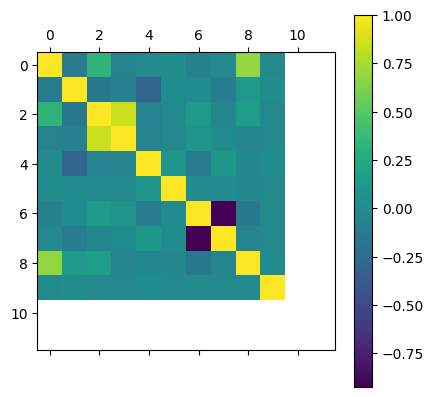

In [19]:
#Correlation Matrix:
import matplotlib.pyplot as plt

corr_matrix = df.corr()
plt.matshow(corr_matrix)
plt.colorbar()
plt.show()


In [20]:
#Feature Engineering
#Create a New Feature:
df['MedInc_AveRooms'] = df['MedInc'] * df['AveRooms']


In [22]:
#Part II: Analyzing Property Age and Price
df['AgeGroup'] = pd.cut(df['HouseAge'], bins=[0, 10, 30, np.inf], labels=['New', 'Old', 'Very Old'])

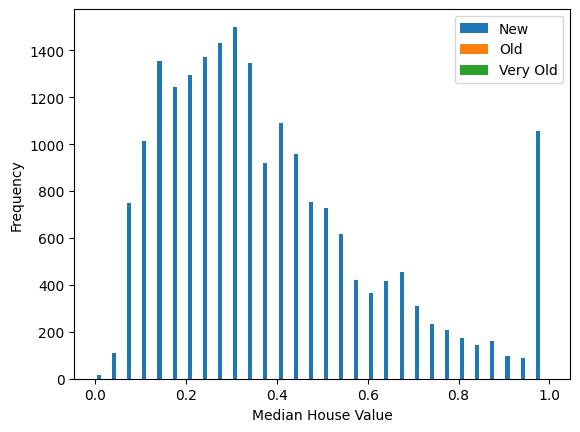

In [23]:
#Plotting Histograms
plt.hist([df[df['AgeGroup'] == 'New']['Target'], df[df['AgeGroup'] == 'Old']['Target'], df[df['AgeGroup'] == 'Very Old']['Target']], bins=30, label=['New', 'Old', 'Very Old'])
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [24]:
#Part III: Analyzing Neighborhood Crime Rate Impact on Prices
#Creating Binned Income
df['IncomeCategory'] = pd.cut(df['MedInc'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])


In [25]:
#Grouping by Binned Income
income_group = df.groupby('IncomeCategory')['Target'].mean().reset_index()


C:\Users\DaveN\AppData\Local\Temp\ipykernel_6616\4125633439.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_group = df.groupby('IncomeCategory')['Target'].mean().reset_index()


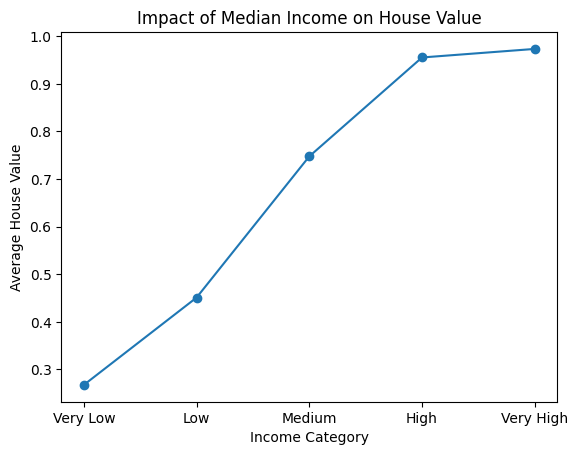

In [26]:
#Plotting Line Plot
plt.plot(income_group['IncomeCategory'], income_group['Target'], marker='o')
plt.xlabel('Income Category')
plt.ylabel('Average House Value')
plt.title('Impact of Median Income on House Value')
plt.show()
